<a href="https://colab.research.google.com/github/lakshay-chaudhary/my_fast_api/blob/main/customer_segmentation_using_advance_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Data Collection & overview

In [68]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [69]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
customer_data.shape

(200, 5)

In [71]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [73]:
numerical_col=customer_data.select_dtypes(include=np.number).columns.to_list()

**Our data is fine and good to go no null values **

## ***We may drop ID Coloumb as it is irrelevant here.***

In [74]:
customer_data.drop(['CustomerID'],axis=1,inplace=True)
numerical_col.remove('CustomerID')

# Data visualization

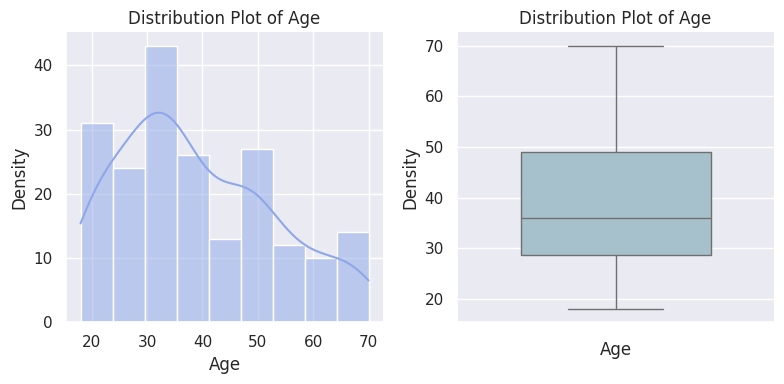

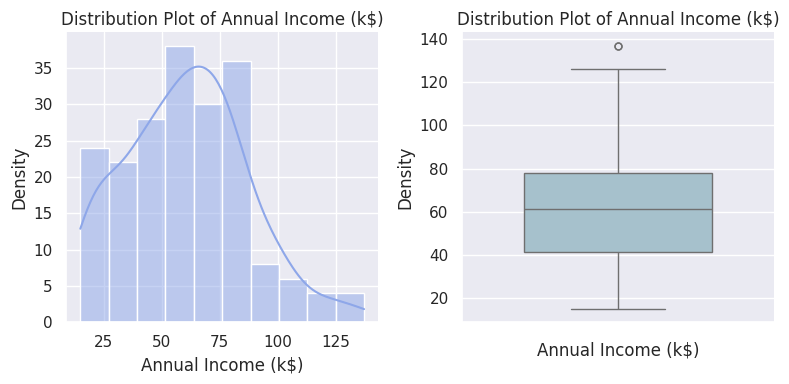

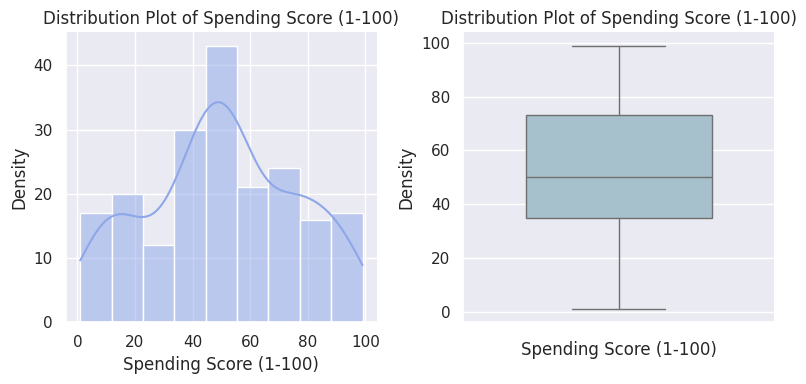

In [75]:
# Assuming your numerical columns are 'age' and 'income', for example
for i in range(len(numerical_col)):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.histplot(customer_data[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(customer_data[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

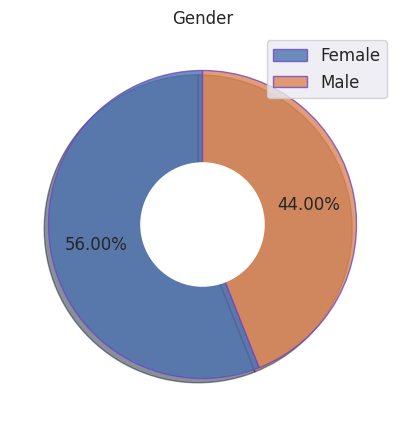

In [76]:
plt.figure(figsize=(6, 5))
plt.pie(customer_data['Gender'].value_counts(), startangle=90,shadow=True,pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='#6C48C5'),textprops={'fontsize':12})
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender')
plt.legend(['Female', 'Male'], loc='best', fontsize=12)
plt.show()

# Data Preprocessing

In [77]:
customer_data['Gender']=LabelEncoder().fit_transform(customer_data['Gender'])
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# **Using PCA before visualizing clusters is helpful when you're working with higher-dimensional data, like data with 4 or more features, for the following reasons**
# 1- If your dataset has more than two features, visualizing it directly on a 2D plot isn't possible. PCA reduces the dimensionality of the data.
# 2- PCA helps retain the most important aspects of the data. Even after reducing the data from 4D to 2D.
# 3- helping to remove noise and make the clusters clearer.

In [78]:
pca = PCA(n_components=2)
x=pca.fit_transform(customer_data)

In [79]:
wcss=[]

for i in range(1,11):

  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

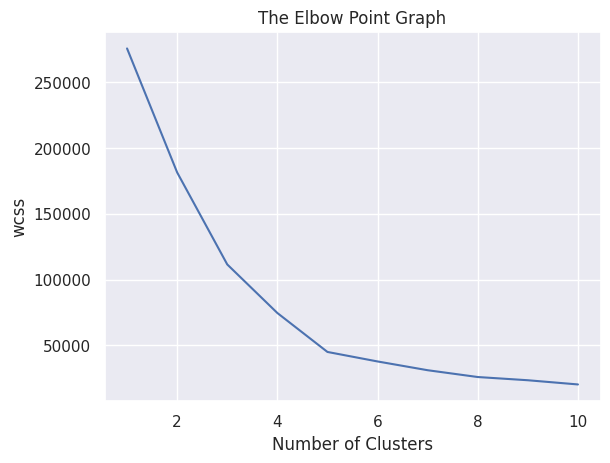

In [80]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

*As we can see that there is a steep dropdown in the cluster value of = 5 so optimal number for this would be 5*



---

**Trainig the K-means clustering model with applied PCA**

In [81]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(x)
print(Y)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


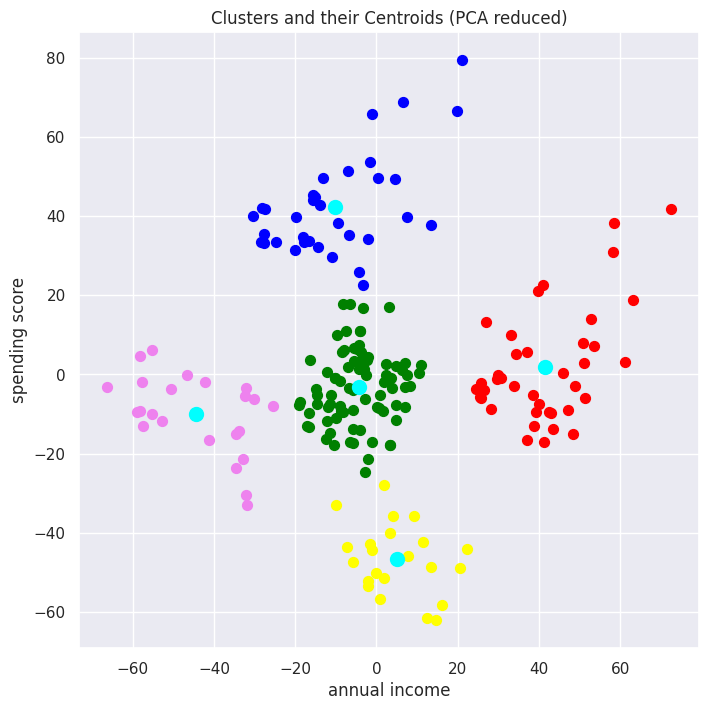

In [82]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Clusters and their Centroids (PCA reduced)')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

# Now clustering without PCA normal k-means clustering

In [83]:
x=customer_data.iloc[:,[2,3]].values


In [84]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(x)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Cluster** **Visualization**

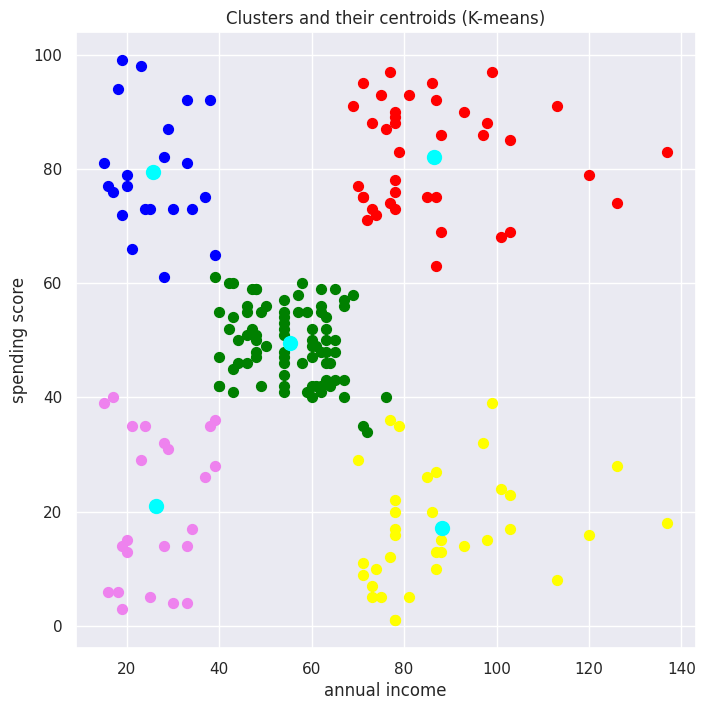

In [85]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Clusters and their centroids (K-means)')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()


**DBSCAN's main advantage over K-Means is its ability to detect clusters of arbitrary shapes and handle noise/outliers, while K-Means assumes spherical clusters and is sensitive to outliers.**

In [ ]:
x_scaled = scaler.fit_transform(x)
print(x_scaled)

**We use the k-NN distance plot to find the best eps value for DBSCAN because it helps identify the "elbow point" where the distance to the kth nearest neighbor increases significantly, indicating a transition from dense to sparse regions in the data space.**

In [86]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x_scaled)
distances, indices = neighbors_fit.kneighbors(x_scaled)
# Sort the distances for the k-nearest neighbors
distances = np.sort(distances[:, 3], axis=0)

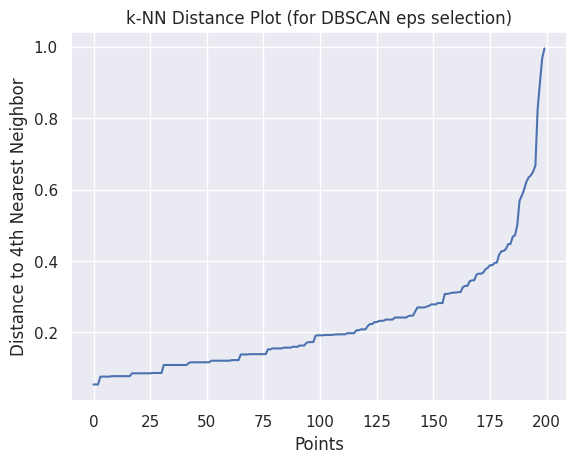

In [87]:
plt.plot(distances)
plt.title("k-NN Distance Plot (for DBSCAN eps selection)")
plt.xlabel("Points")
plt.ylabel("Distance to 4th Nearest Neighbor")
plt.show()

**As we can see that it is not easy for us to determine the value of the eps and min_samples from just looking into graph so we would be usin silhouette_score method to determine the best eps value **

In [103]:
def evaluate_dbscan(X, eps_range, min_samples_range):
    best_score = -1
    best_params = None
    results = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X)

            n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            n_noise = list(clusters).count(-1)

            if n_clusters > 1:
                score = silhouette_score(X, clusters)
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)

                results.append((eps, min_samples, n_clusters, n_noise, score))

    return best_params, results

# Define parameter ranges
eps_range = np.arange(0.1, 0.5, 0.05)
min_samples_range = range(2, 10)

best_params, results = evaluate_dbscan(x_scaled, eps_range, min_samples_range)

print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")

# Print top 5 results
sorted_results = sorted(results, key=lambda x: x[4], reverse=True)[:5]
for eps, min_samples, n_clusters, n_noise, score in sorted_results:
    print(f"eps={eps:.2f}, min_samples={min_samples}: clusters={n_clusters}, noise={n_noise}, score={score:.3f}")

Best parameters: eps=0.3500000000000001, min_samples=3
eps=0.35, min_samples=3: clusters=7, noise=11, score=0.476
eps=0.35, min_samples=2: clusters=9, noise=7, score=0.444
eps=0.35, min_samples=5: clusters=6, noise=23, score=0.437
eps=0.35, min_samples=4: clusters=7, noise=16, score=0.426
eps=0.45, min_samples=9: clusters=5, noise=24, score=0.424


# Visualizing clusters

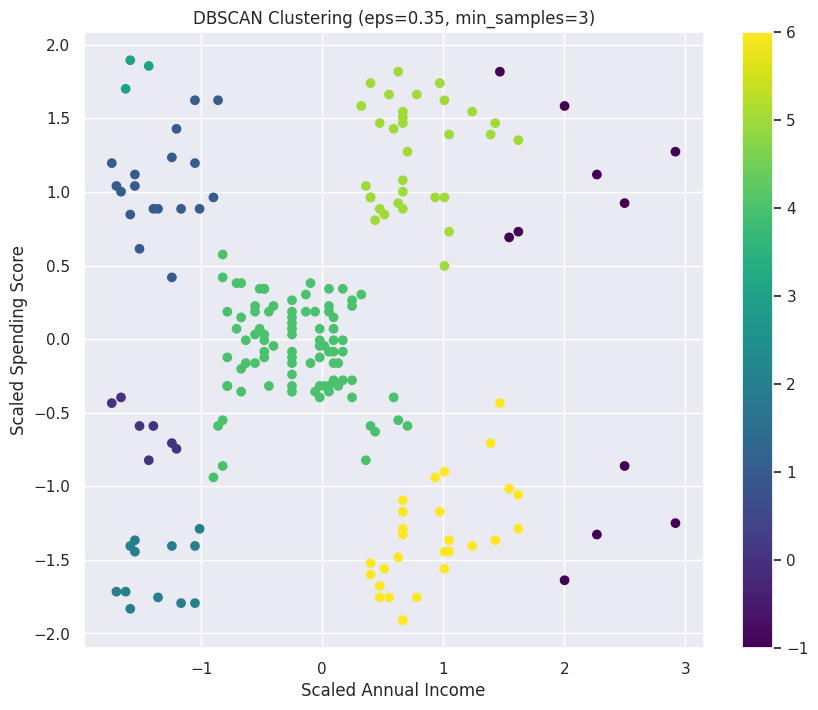

In [109]:
best_eps, best_min_samples = best_params
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(x_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title(f'DBSCAN Clustering (eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.show()

# Creating and fitting model using Gaussian Miture Model (GMM)

**GMM's Advantages Over K-Means:
GMM is more flexible than K-Means as it allows clusters to take an elliptical shape, while K-Means assumes spherical clusters.
GMM accounts for the probability of a point belonging to each cluster rather than assigning a hard cluster label like K-Means.**

In [112]:
gmm = GaussianMixture(n_components=5, random_state=42)  # 4 clusters assumed

# Fit the model
gmm.fit(x_scaled)

# Predict the clusters
clusters = gmm.predict(x_scaled)

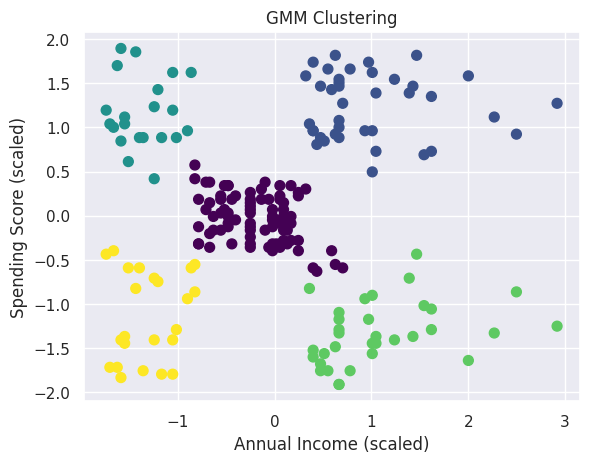

In [113]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('GMM Clustering')
plt.show()